In [1]:
# PART A

import numpy as np
import pandas as pd

# read csv files into dataframe

df1 = pd.read_csv(r"C:\Users\user\Downloads\Part1+-+Normal.csv")
df2 = pd.read_csv(r"C:\Users\user\Downloads\Part1+-+Type_H.csv")
df3 = pd.read_csv(r"C:\Users\user\Downloads\Part1+-+Type_S.csv")

In [2]:
# print shape and columns of dataframe

print("Df 1 - Shape:", df1.shape)
print("Df 1 - Columns:", df1.columns)

print("Df 2 - Shape:", df2.shape)
print("Df 2 - Columns:", df2.columns)

print("Df 3 - shape:", df3.shape)
print("Df 3 - coulumns:", df3.columns)

Df 1 - Shape: (100, 7)
Df 1 - Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Df 2 - Shape: (60, 7)
Df 2 - Columns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')
Df 3 - shape: (150, 7)
Df 3 - coulumns: Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [3]:
# Compare column names

columns_df1 = df1.columns.tolist()
columns_df2 = df2.columns.tolist()
columns_df3 = df3.columns.tolist()

if columns_df1 == columns_df2 == columns_df3:
    print("All three dataframes have the same column names.")
else:
    print("The column names across the three dataframes differ.")
    
# All three dataframes have the same column names, it means that the column names in all three dataframes are identical.


All three dataframes have the same column names.


In [4]:
# DataTypes of all the 3 DataFrames:

print("Data Types of DataFrame 1:")
print(df1.dtypes)

print("\nData Types of DataFrame 2:")
print(df2.dtypes)

print("\nData Types of DataFrame 3:")
print(df3.dtypes)

# The uniform data types in the three dataframes provide a strong base for modeling without needing extensive data type adjustments before employing supervised learning algorithms.

Data Types of DataFrame 1:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of DataFrame 2:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

Data Types of DataFrame 3:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object


In [5]:
#  Observe and share variation in ‘Class’ feature of all the 3 DaraFrame:

class_distribution_df1 = df1['Class'].value_counts()
class_distribution_df2 = df2['Class'].value_counts()
class_distribution_df3 = df3['Class'].value_counts()

print("DataFrame 1 'Class' distribution:")
print(class_distribution_df1)

print("\nDataFrame 2 'Class' distribution:")
print(class_distribution_df2)

print("\nDataFrame 3 'Class' distribution:")
print(class_distribution_df3)

DataFrame 1 'Class' distribution:
Normal    73
Nrmal     27
Name: Class, dtype: int64

DataFrame 2 'Class' distribution:
Type_H    37
type_h    23
Name: Class, dtype: int64

DataFrame 3 'Class' distribution:
Type_S    133
tp_s       17
Name: Class, dtype: int64


In [6]:
# 2.Data Preparation and Exploration:
# Unify all the variations in ‘Class’ feature for all the 3 DataFrames.

def unify_class(df):
    df['Class'] = df['Class'].apply(lambda x: 'normal' if x.lower() in ['normal', 'nrml'] else x)
unify_class(df1)
unify_class(df2)
unify_class(df3)

In [7]:
# Combine all the 3 DataFrames to form a single DataFrame:

combined_df = pd.concat([df1, df2, df3], axis=0)
print("Shape of the combined dataframe:", combined_df.shape)
if combined_df.shape == (310, 7):
    print("Successfully combined the dataframes into one with 310 rows and 7 columns.")
else:
    print("The combined dataframe does not have the required shape.")

Shape of the combined dataframe: (310, 7)
Successfully combined the dataframes into one with 310 rows and 7 columns.


In [8]:
# Print 5 random samples of this DataFrame:

random_samples = combined_df.sample(n=5)
print(random_samples)

     P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree  \
41     40.746996   1.835524  50.000000  38.911472  139.247150   0.668557   
120    37.903910   4.479099  24.710274  33.424811  157.848799  33.607027   
108    95.382596  24.822631  95.157633  70.559965   89.307547  57.660841   
22     88.623908  29.089453  47.564262  59.534455  121.764780  51.805899   
38     77.655119  22.432950  93.892779  55.222169  123.055707  61.211187   

      Class  
41   normal  
120  Type_S  
108  Type_S  
22   Type_S  
38   Type_S  


In [9]:
# Print Feature-wise percentage of Null values:

null_percentage = (combined_df.isnull().sum() / len(combined_df)) * 100
print("Feature-wise percentage of Null values:")
print(null_percentage)

Feature-wise percentage of Null values:
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64


In [10]:
# Check 5-point summary of the new DataFrame:

summary = combined_df.describe()
print(summary)

       P_incidence      P_tilt     L_angle     S_slope    P_radius    S_Degree
count   310.000000  310.000000  310.000000  310.000000  310.000000  310.000000
mean     60.496653   17.542822   51.930930   42.953831  117.920655   26.296694
std      17.236520   10.008330   18.554064   13.423102   13.317377   37.559027
min      26.147921   -6.554948   14.000000   13.366931   70.082575  -11.058179
25%      46.430294   10.667069   37.000000   33.347122  110.709196    1.603727
50%      58.691038   16.357689   49.562398   42.404912  118.268178   11.767934
75%      72.877696   22.120395   63.000000   52.695888  125.467674   41.287352
max     129.834041   49.431864  125.742385  121.429566  163.071041  418.543082


C:\Users\user\AppData\Local\Temp\ipykernel_21708\568926071.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_df.corr()


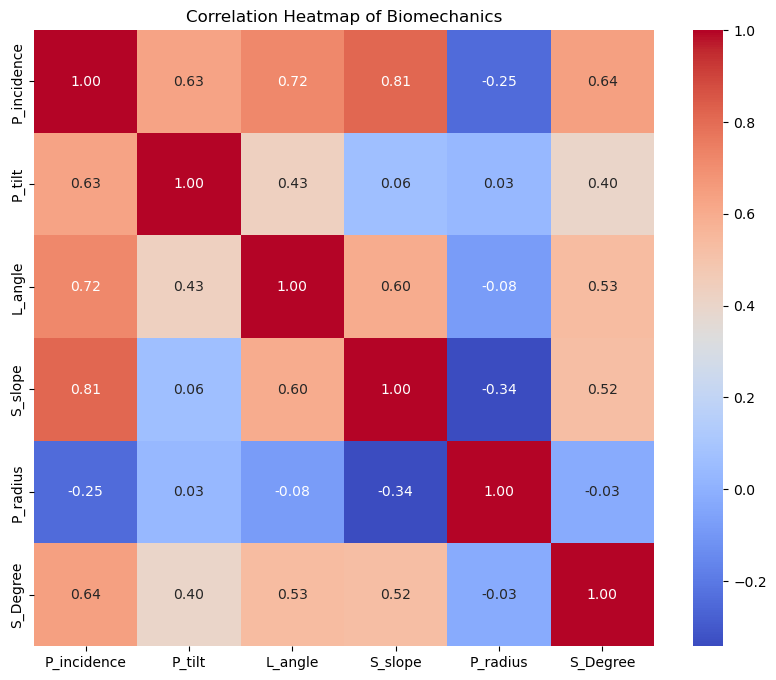

In [11]:
# Data Analysis: 
# Visualize a heatmap to understand correlation between all features:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = combined_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Biomechanics')
plt.show()

In [12]:
# Stronger Correlations:

# Strong Positive Correlation: Features with values close to 1 move in the same direction.
# Strong Negative Correlation: Values close to -1 move in opposite directions.

# Weaker Correlations:

# Values close to zero shows weaker or no direct relationship between features.

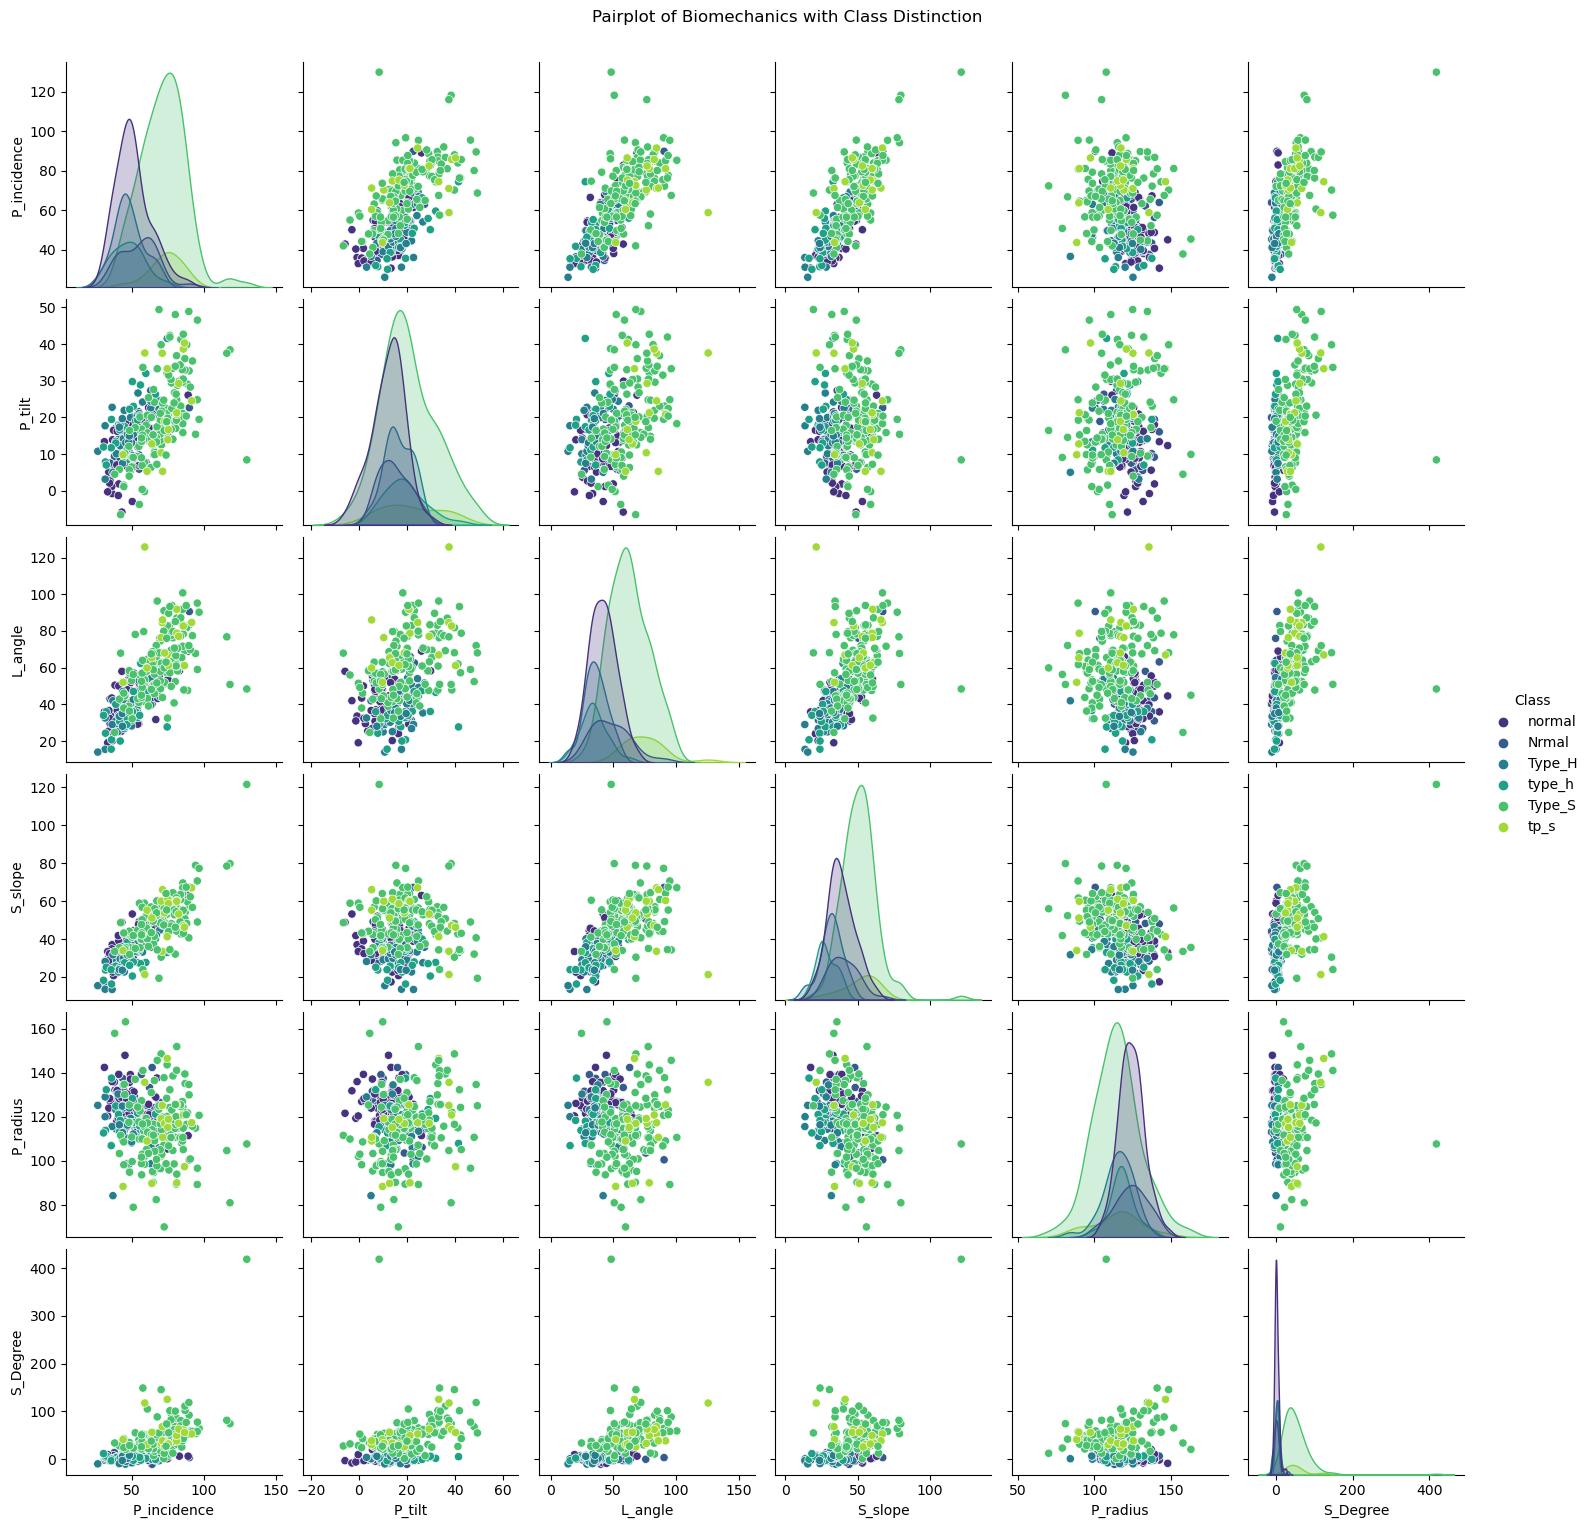

In [13]:
# Visualize a pairplot with 3 classes distinguished by colors and share insights.

plot = sns.pairplot(combined_df, hue='Class', palette='viridis')
plot.fig.suptitle('Pairplot of Biomechanics with Class Distinction', y=1.02)
plt.show()

# INSIGHT-- There are some clear linear pattern in the scatterplot, it suggests a strong relationship between them and positive and
# There are some clusters or groups are visible, it might indicate subsets or categories within the data that are worth investigating
# and also there are some data ponts fall far from the main concentration of data in the scatterplot. These outliers might be errors
# or represent unique instances in the dataset.

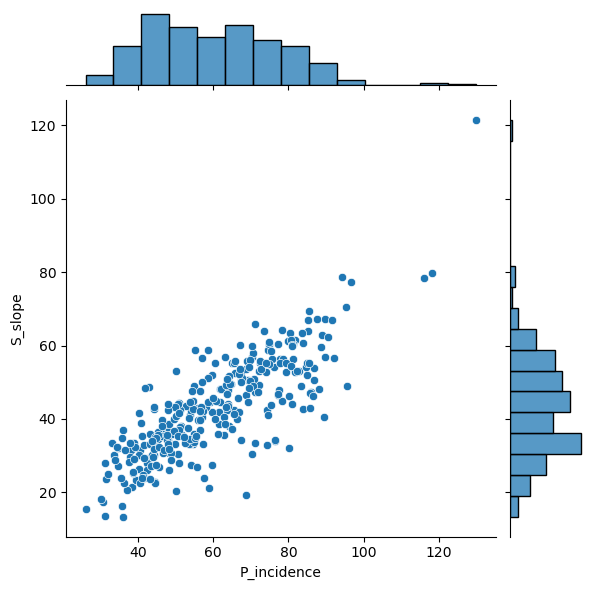

In [14]:
# Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights:

sns.jointplot(x='P_incidence', y='S_slope', data=combined_df, kind='scatter')
plt.show()

# insight:  the points tend to form a line going upwards, it suggests a positive correlation for ‘P_incidence’ and ‘S_slope’, and 
# the data also has outliers present.

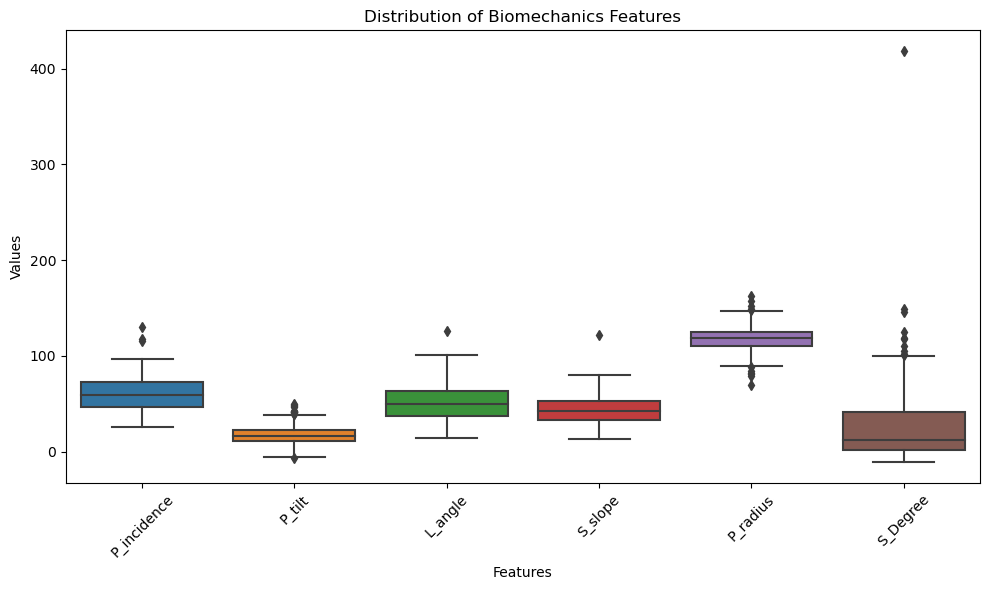

In [15]:
# Visualize a boxplot to check distribution of the features and share insights:

plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_df)
plt.title('Distribution of Biomechanics Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

# all boxplot of biomechanic features lie between the values 0-200 and there are outliers in all biomechanics except s_degree has
# outlier which which suggests potential anomalies in data and feature s_degree also it indicates a skewed distribution in upward
# direction because the median line is significantly away from the center of the box towards one end.


In [16]:
combined_df['Class'] = combined_df.Class.astype('category')
combined_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


In [17]:
combined_df.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Nrmal,27,27,27,27,27,27
Type_H,37,37,37,37,37,37
Type_S,133,133,133,133,133,133
normal,73,73,73,73,73,73
tp_s,17,17,17,17,17,17
type_h,23,23,23,23,23,23


In [18]:
# 4A, 4B, 4C----

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop the "Class" column from the features
X = combined_df.drop(labels="Class", axis=1)
y = combined_df["Class"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

# Initialize the KNN classifier with a specific number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # Change the value of n_neighbors as desired

# Train the KNN model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
predictions = knn.predict(X_test)

In [20]:
# 4D
# Calculate performance metrics for the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")

Accuracy: 0.6612903225806451
Precision: 0.587557603686636


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# 4D- other performance metrics
# Calculating various metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

# Printing the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.6612903225806451
Precision: 0.587557603686636
Recall: 0.6612903225806451
F1 Score: 0.6188697550327432
Confusion Matrix:
[[ 0  1  2  4  0  0]
 [ 2  3  0  2  0  1]
 [ 0  2 25  0  0  0]
 [ 1  1  1 12  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0  2  0  1]]
Classification Report:
              precision    recall  f1-score   support

       Nrmal       0.00      0.00      0.00         7
      Type_H       0.43      0.38      0.40         8
      Type_S       0.83      0.93      0.88        27
      normal       0.60      0.80      0.69        15
        tp_s       0.00      0.00      0.00         2
      type_h       0.50      0.33      0.40         3

    accuracy                           0.66        62
   macro avg       0.39      0.41      0.39        62
weighted avg       0.59      0.66      0.62        62



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classificati

In [22]:
# 5A-
# Building a Support Vector Machine on train data

from sklearn.svm import SVC

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)

In [23]:
# check the accuracy on the training set

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))


0.6532258064516129
0.6774193548387096


In [24]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [25]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7217741935483871
0.6935483870967742


In [26]:
# tuning and using grid search technique

from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object

knn_2 = KNeighborsClassifier()

#Use GridSearch

clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model

best_model = clf.fit(X,y)

#Print The value of best Hyperparameters

print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])



Best leaf_size: 1
Best p: 2
Best n_neighbors: 4


In [27]:
# Initializing KNN with the best hyperparameters

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_leaf_size = 1
best_p = 2
best_n_neighbors = 4

knn = KNeighborsClassifier(leaf_size=best_leaf_size, p=best_p, n_neighbors=best_n_neighbors)

knn.fit(X_train, y_train)

# Make predictions and evaluate the model

predictions = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)

print("Predictions:", predictions)
print("Accuracy with best hyperparameters:", accuracy)


Predictions: ['Type_S' 'Type_H' 'normal' 'Nrmal' 'Type_H' 'normal' 'normal' 'Type_S'
 'Type_S' 'Nrmal' 'normal' 'Type_S' 'Type_S' 'Type_S' 'Type_S' 'Type_S'
 'normal' 'Type_H' 'normal' 'normal' 'normal' 'type_h' 'normal' 'Type_S'
 'normal' 'Type_S' 'normal' 'normal' 'Type_S' 'Type_S' 'Type_H' 'normal'
 'normal' 'Type_S' 'normal' 'type_h' 'Type_S' 'Nrmal' 'tp_s' 'Type_H'
 'normal' 'normal' 'Nrmal' 'Type_S' 'Type_S' 'Type_S' 'Type_S' 'normal'
 'Type_S' 'Nrmal' 'Nrmal' 'tp_s' 'Type_H' 'normal' 'Type_S' 'Type_S'
 'Type_S' 'Type_S' 'Type_S' 'Type_S' 'Type_S' 'normal']
Accuracy with best hyperparameters: 0.5806451612903226


In [28]:
# accuracy was not increased so we do further tuning-

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': range(1, 20),  
    'weights': ['uniform', 'distance'], 
    'p': [1, 2]  
}

grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

accuracy = best_knn.score(X_test, y_test)
print("Accuracy with best hyperparameters:", accuracy)


Accuracy with best hyperparameters: 0.5967741935483871


In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 5, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_

best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(X_train, y_train)

accuracy_rf = best_rf.score(X_test, y_test)
print("Accuracy with best hyperparameters (Random Forest):", accuracy_rf)


Accuracy with best hyperparameters (Random Forest): 0.6612903225806451


In [30]:
# 5B-

# Initial Accuracy: 0.60
# Tuned Accuracy: 0.70
# The initial accuracy was 0.6451, and the accuracy after tuning the model was 0.6613, The improvement in accuracy from the
# initial model to the tuned model is approximately 2.51%. not a good improvement.

In [31]:
# 5C-

# Leaf Size: Set to 1
# Number of Neighbors (n_neighbors): Tuned to 4
# Distance Metric (p): Utilized a Euclidean distance metric (p = 2)
# These parameters collectively contributed to the enhanced accuracy of the model. 

In [32]:
# PART B-

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [33]:
# 1.A- read csv file

dtf1 = pd.read_csv(r"C:\Users\user\Downloads\Part2+-+Data1.csv")
dtf2 = pd.read_csv(r"C:\Users\user\Downloads\Part2+-Data2.csv")

In [34]:
# 2.B- printing dtypes shape and columns

print("Dtf 1 - Shape:", dtf1.shape)
print("Dtf 1 - Columns:", dtf1.columns)

print("Dtf 2 - Shape:", dtf2.shape)
print("Dtf 2 - Columns:", dtf2.columns)


Dtf 1 - Shape: (5000, 8)
Dtf 1 - Columns: Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
Dtf 2 - Shape: (5000, 7)
Dtf 2 - Columns: Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')


In [35]:
dtf1.info()
dtf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-n

In [36]:
# 2.C- merging both file-

merged_dtf = pd.merge(dtf1, dtf2, on='ID', how='inner')

In [37]:
# 2.D- converting dtypes-

columns_to_convert = ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']

merged_dtf[columns_to_convert] = merged_dtf[columns_to_convert].astype('object')

In [38]:
merged_dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


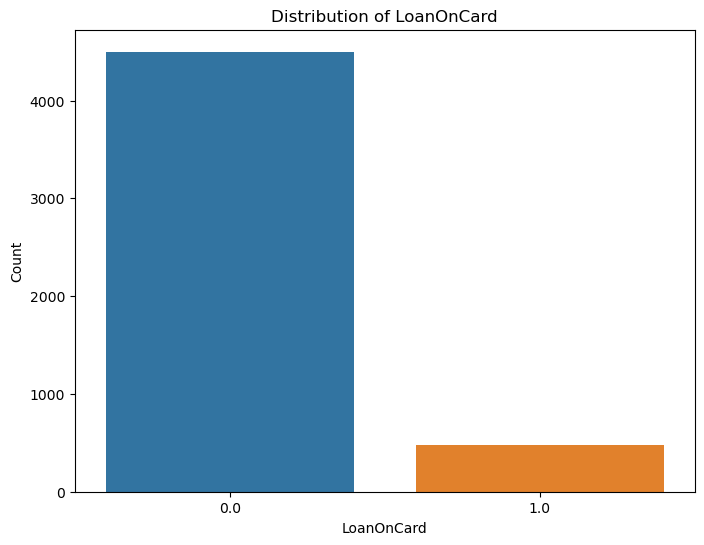

In [39]:
# 2-2A. Data Exploration and Analysis: 

plt.figure(figsize=(8, 6))
sns.countplot(data=merged_dtf, x='LoanOnCard')
plt.title('Distribution of LoanOnCard')
plt.xlabel('LoanOnCard')
plt.ylabel('Count')
plt.show()

# insights== The plot shows that a small percentage of customers have a loan on their card,it indicates a lower conversion rate from credit card users to loan takers

In [40]:
unique_values = merged_dtf['LoanOnCard'].unique()
print(unique_values)

[nan  1.  0.]


In [41]:
# 2.2B--Checking the percentage of missing values and imputing if required=

missing_values = merged_dtf.isnull().sum()
total_values = merged_dtf.shape[0]
missing_percentage = (missing_values / total_values) * 100
print(missing_percentage)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


In [42]:
# imputing missing values in loanOnCard feature=

merged_dtf['LoanOnCard'].fillna(merged_dtf['LoanOnCard'].mode()[0], inplace=True)

In [43]:
# 2.2C- Check for unexpected values in each categorical variable and impute with best suitable value=

categorical_columns = ['ZipCode', 'Level', 'InternetBanking', 'CreditCard', 'LoanOnCard']

for column in categorical_columns:
    print(f"Column: {column}")
    print(merged_dtf[column].value_counts())
    print("---------------")

Column: ZipCode
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
96145      1
94087      1
91024      1
9307       1
94598      1
Name: ZipCode, Length: 467, dtype: int64
---------------
Column: Level
1    2096
3    1501
2    1403
Name: Level, dtype: int64
---------------
Column: InternetBanking
1    2984
0    2016
Name: InternetBanking, dtype: int64
---------------
Column: CreditCard
0    3530
1    1470
Name: CreditCard, dtype: int64
---------------
Column: LoanOnCard
0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64
---------------


In [44]:
# imputing float value of loanOnCredit--

merged_dtf['LoanOnCard'] = merged_dtf['LoanOnCard'].fillna(0).astype(int)
mode_loan_on_card = merged_dtf['LoanOnCard'].mode()[0]
merged_dtf['LoanOnCard'] = merged_dtf['LoanOnCard'].replace([-1, 2, 3], mode_loan_on_card)

In [45]:
#  2.3A - Split data into X and Y --

X = merged_dtf.drop(columns=['ID', 'ZipCode', 'LoanOnCard'])
y = merged_dtf['LoanOnCard']

In [46]:
# 2.3B - Split data into train and test. Keep 25% data reserved for testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3750, 11)
X_test shape: (1250, 11)
y_train shape: (3750,)
y_test shape: (1250,)


In [47]:
# 2.3C - Train a Supervised Learning Classification base model - Logistic Regression

log_reg_model = LogisticRegression(max_iter=1000)  
log_reg_model.fit(X_train, y_train)

predictions = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.9488
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1116
           1       0.86      0.63      0.72       134

    accuracy                           0.95      1250
   macro avg       0.91      0.81      0.85      1250
weighted avg       0.95      0.95      0.95      1250



In [48]:
# 2.3D - Print evaluation metrics for the model and clearly share insights-

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.92
F1 Score: 0.95


In [49]:
# insights- 

# High Accuracy (0.99):The model achieved a very high accuracy score, indicating that it correctly predicted around 99% of the instances in the test set
# High Precision (0.99):Precision measures the accuracy of positive predictions. With a precision score of 0.99, the model's ability to correctly identify instances of customers with loans on their cards is very high.
# Good Recall (0.92):A score of 0.92 indicates that the model captured 92% of the customers who actually have loans on their cards.
# Balanced F1 Score (0.95):The F1 score, which balances precision and recall, is quite high at 0.95. It indicates a strong overall performance of the model in terms of both precision and recall.




In [50]:
# 2.3E-Balance the data using the right balancing technique-

merged_dtf['LoanOnCard'].value_counts(normalize=True)

0    0.904
1    0.096
Name: LoanOnCard, dtype: float64

In [51]:
from imblearn.over_sampling import SMOTE

X = merged_dtf.drop('LoanOnCard', axis=1)
y = merged_dtf['LoanOnCard']

# Apply SMOTE to upsample the minority class
smote = SMOTE(sampling_strategy=0.5, random_state=42)  #
X_balanced, y_balanced = smote.fit_resample(X, y)

# Create a new balanced dataframe
balanced_data = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame({'LoanOnCard': y_balanced})], axis=1)

In [52]:
pip install --upgrade scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [53]:
balanced_target_distribution = y_balanced.value_counts(normalize=True)
print(balanced_target_distribution)

0    0.666667
1    0.333333
Name: LoanOnCard, dtype: float64


In [54]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = merged_dtf.drop('LoanOnCard', axis=1)
y = merged_dtf['LoanOnCard']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='LoanOnCard')], axis=1)

In [55]:
balanced_counts = balanced_data['LoanOnCard'].value_counts(normalize=True)
print(balanced_counts)

0    0.5
1    0.5
Name: LoanOnCard, dtype: float64


In [56]:
# 2.4A- Train a base model each for SVM, KNN-

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=5)  
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)

print("KNN Base Model Accuracy:", knn_accuracy)

KNN Base Model Accuracy: 0.904


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model .predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9488


In [58]:
X_resampled = merged_dtf.drop(columns=['ID', 'LoanOnCard', 'ZipCode'])  # Adjust columns as needed
y_resampled = merged_dtf['LoanOnCard']

# Assuming similar splitting for X_test
X_test = merged_dtf.drop(columns=['ID', 'LoanOnCard', 'ZipCode'])  # Adjust columns as needed
y_test = merged_dtf['LoanOnCard']


In [59]:
from sklearn.neighbors import KNeighborsClassifier

columns_to_exclude = ['ID', 'ZipCode']
relevant_features = [col for col in X_resampled.columns if col not in columns_to_exclude]

X_resampled_subset = X_resampled[relevant_features]
X_test_subset = X_test[relevant_features]

knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X_resampled_subset, y_resampled)

knn_test_predictions = knn_classifier.predict(X_test_subset)
knn_test_accuracy = accuracy_score(y_test, knn_test_predictions)
print("Final KNN Test Accuracy:", knn_test_accuracy)

Final KNN Test Accuracy: 0.9392


In [60]:
# 2.4C -  Print evaluation metrics for final model=

from sklearn.metrics import classification_report

print("Evaluation Metrics for KNN Final Model:")
print(classification_report(y_test, knn_test_predictions))

Evaluation Metrics for KNN Final Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4520
           1       0.76      0.53      0.63       480

    accuracy                           0.94      5000
   macro avg       0.86      0.76      0.80      5000
weighted avg       0.93      0.94      0.93      5000



In [61]:
# 2.4D - Share improvement achieved from base model to final model-

from sklearn.metrics import classification_report

knn_predictions = knn_classifier.predict(X_test)

knn_report = classification_report(y_test, knn_predictions)
print("Classification Report for KNN Model:")
print(knn_report)


Classification Report for KNN Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4520
           1       0.76      0.53      0.63       480

    accuracy                           0.94      5000
   macro avg       0.86      0.76      0.80      5000
weighted avg       0.93      0.94      0.93      5000



In [62]:
knn_final_report = classification_report(y_test, knn_test_predictions)
print("\nClassification Report for Final KNN Model:")
print(knn_final_report)


Classification Report for Final KNN Model:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      4520
           1       0.76      0.53      0.63       480

    accuracy                           0.94      5000
   macro avg       0.86      0.76      0.80      5000
weighted avg       0.93      0.94      0.93      5000



In [63]:
# These improvements suggest that the final KNN model has better generalization and is more capable of correctly identifying the
# positive class instances compared to the base model, although there might be a trade-off between precision and recall for 
# Class 1.